In [1]:
pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     ------------------ ------------------- 41.0/82.7 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 664.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105795 sha256=0171b8938fa6deb2dc8fd5995ec09dd6af528c4baebf7ffb05d8dae485337509
  Stored in directory: c:\users\battu\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os

# Set Kaggle dataset URL and output directory
dataset_url = "apollo2506/landuse-scene-classification"
output_dir = "landuse_scene_classification"

# Download the dataset using Kaggle API
os.system(f"kaggle datasets download -d {dataset_url} -p {output_dir} --unzip")

print(f"Dataset downloaded and extracted to: {output_dir}")

Dataset downloaded and extracted to: landuse_scene_classification


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "landuse_scene_classification/train.csv"  # Replace with the actual file path
df = pd.read_csv(data_path)

# Display the first few rows
print("Initial Dataset:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

Initial Dataset:
   Unnamed: 0                              Filename  Label     ClassName
0        5818              runway/runway_000259.png     16        runway
1        1327  intersection/intersection_000348.png     10  intersection
2        2529  agricultural/agricultural_000025.png      0  agricultural
3        3865        chaparral/chaparral_000195.png      5     chaparral
4        2024          airplane/airplane_000260.png      1      airplane

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7350 entries, 0 to 7349
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7350 non-null   int64 
 1   Filename    7350 non-null   object
 2   Label       7350 non-null   int64 
 3   ClassName   7350 non-null   object
dtypes: int64(2), object(2)
memory usage: 229.8+ KB
None

Missing Values:
Unnamed: 0    0
Filename      0
Label         0
ClassName     0
dtype: int64

Duplicate Rows:
0


In [10]:
df['Label'].unique()

array([16, 10,  0,  5,  1, 18, 19, 13, 20,  4, 11,  2,  9,  8, 17, 15, 12,
        7,  3, 14,  6], dtype=int64)

In [13]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        Unnamed: 0        Label
count  7350.000000  7350.000000
mean   3674.500000    10.000000
std    2121.906572     6.055713
min       0.000000     0.000000
25%    1837.250000     5.000000
50%    3674.500000    10.000000
75%    5511.750000    15.000000
max    7349.000000    20.000000


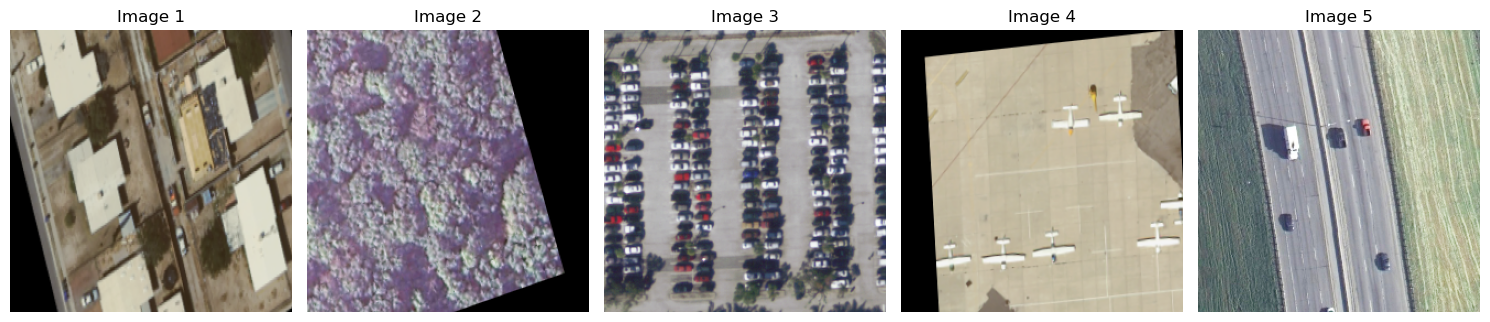

In [19]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Path to the dataset folder (update this to your dataset's folder path)
dataset_path = "landuse_scene_classification/images"  # Replace with the actual path

# Get a list of all image files in the dataset
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Include common image formats
            image_files.append(os.path.join(root, file))

# Randomly select 5 images to display
random_images = random.sample(image_files, 5)

# Display the random images
plt.figure(figsize=(15, 10))
for i, image_path in enumerate(random_images):
    img = Image.open(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [26]:
df.head()

,Unnamed: 0,Filename,Label,ClassName
0,5818,runway/runway_000259.png,16,runway
1,1327,intersection/intersection_000348.png,10,intersection
2,2529,agricultural/agricultural_000025.png,0,agricultural
3,3865,chaparral/chaparral_000195.png,5,chaparral
4,2024,airplane/airplane_000260.png,1,airplane


In [38]:
df.columns

Index(['Unnamed: 0', 'Filename', 'Label', 'ClassName'], dtype='object')

## Cleaning Dataset

In [116]:
df_cleaned=df.copy()
df_cleaned.head

<bound method NDFrame.head of       Unnamed: 0                                        Filename  Label  \
0           5818                        runway/runway_000259.png     16   
1           1327            intersection/intersection_000348.png     10   
2           2529            agricultural/agricultural_000025.png      0   
3           3865                  chaparral/chaparral_000195.png      5   
4           2024                    airplane/airplane_000260.png      1   
...          ...                                             ...    ...   
7345         779        mobilehomepark/mobilehomepark_000090.png     12   
7346        6148                parkinglot/parkinglot_000386.png     14   
7347        1453                      freeway/freeway_000235.png      8   
7348        5252      baseballdiamond/baseballdiamond_000144.png      2   
7349        6722  mediumresidential/mediumresidential_000386.png     11   

              ClassName  
0                runway  
1          inters

In [118]:
df_cleaned.rename(columns={'Unnamed: 0': 'Id'},inplace=True)

In [120]:
df_cleaned.sort_values(by='Id', ascending=True,inplace=True)

In [122]:
df_cleaned.set_index('Id', inplace=True)

In [124]:
df_cleaned.iloc[:500]

,Filename,Label,ClassName
Id,,,
0,beach/beach_000172.png,3,beach
1,beach/beach_000107.png,3,beach
2,beach/beach_000298.png,3,beach
3,beach/beach_000053.png,3,beach
4,beach/beach_000018.png,3,beach
...,...,...,...
495,buildings/buildings_000246.png,4,buildings
496,buildings/buildings_000017.png,4,buildings
497,buildings/buildings_000249.png,4,buildings


In [126]:
df_cleaned.drop(axis=0, columns='Label',inplace=True)
df_cleaned.head()

,Filename,ClassName
Id,,
0,beach/beach_000172.png,beach
1,beach/beach_000107.png,beach
2,beach/beach_000298.png,beach
3,beach/beach_000053.png,beach
4,beach/beach_000018.png,beach


In [130]:
df_cleaned.shape

(7350, 2)

In [133]:

df_nan = pd.DataFrame(df_cleaned)

# Sort by 'ID' with NaN values at the beginning
df_sorted_nan = df_nan.sort_values(by='Id', na_position='first')

print("\nDataFrame sorted by 'ID' with NaN values at the beginning:")
print(df_sorted_nan)


DataFrame sorted by 'ID' with NaN values at the beginning:
                                          Filename         ClassName
Id                                                                  
0                           beach/beach_000172.png             beach
1                           beach/beach_000107.png             beach
2                           beach/beach_000298.png             beach
3                           beach/beach_000053.png             beach
4                           beach/beach_000018.png             beach
...                                            ...               ...
7345  denseresidential/denseresidential_000492.png  denseresidential
7346  denseresidential/denseresidential_000057.png  denseresidential
7347  denseresidential/denseresidential_000167.png  denseresidential
7348  denseresidential/denseresidential_000434.png  denseresidential
7349  denseresidential/denseresidential_000468.png  denseresidential

[7350 rows x 2 columns]


So I dint find any NaN on Null or missing values in the datframe.

In [147]:

# Save the DataFrame to a CSV file
df_cleaned.to_csv('cleaned_landuse_scene_classification.csv', index=False)

print("DataFrame has been saved to 'output.csv'")

DataFrame has been saved to 'output.csv'


### EDA

###### Random Image Samples

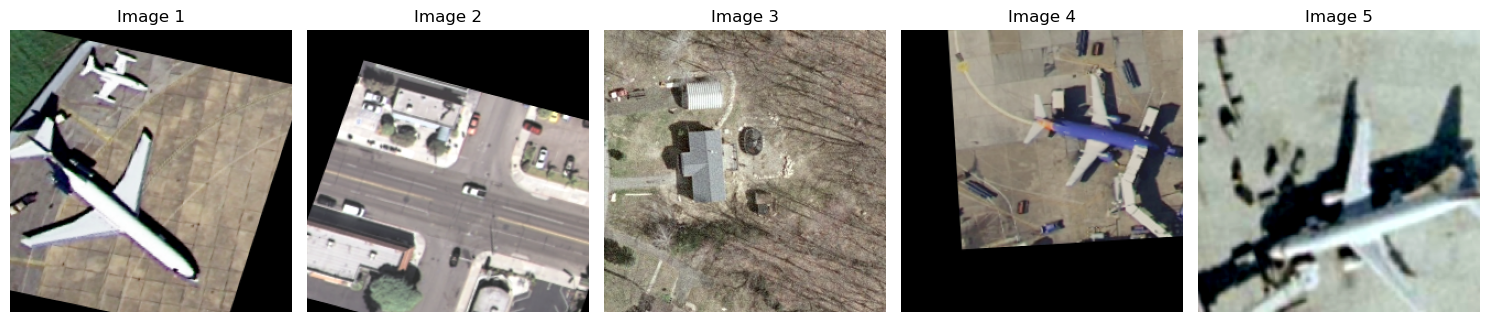

In [176]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Path to the dataset folder (update this to your dataset's folder path)
dataset_path = "landuse_scene_classification/images"  # Replace with the actual path

# Get a list of all image files in the dataset
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Include common image formats
            image_files.append(os.path.join(root, file))

# Randomly select 5 images to display
random_images = random.sample(image_files, 5)

# Display the random images
plt.figure(figsize=(15, 10))
for i, image_path in enumerate(random_images):
    img = Image.open(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

###### Class Distribution

In [183]:
import os

folder_path = "landuse_scene_classification/images"

# Get list of subdirectories (image classes)
classes = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

print(f"Number of image classes: {len(classes)}")
print("Classes:", classes)


Number of image classes: 21
Classes: ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']


C:\Users\battu\AppData\Local\Temp\ipykernel_11096\1166279747.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


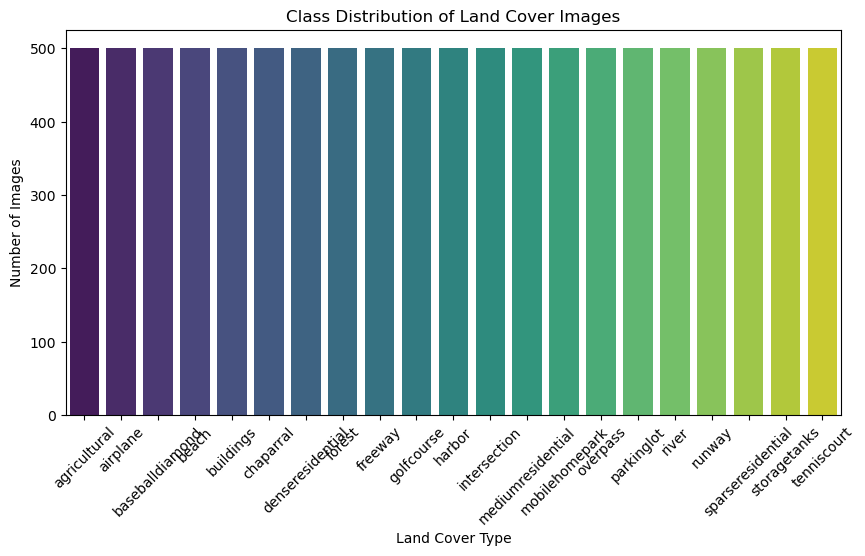

In [220]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = "landuse_scene_classification/images"

class_counts = {class_name: len(os.listdir(os.path.join(folder_path, class_name)))
                for class_name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, class_name))}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Land Cover Type")
plt.ylabel("Number of Images")
plt.title("Class Distribution of Land Cover Images")
plt.show()


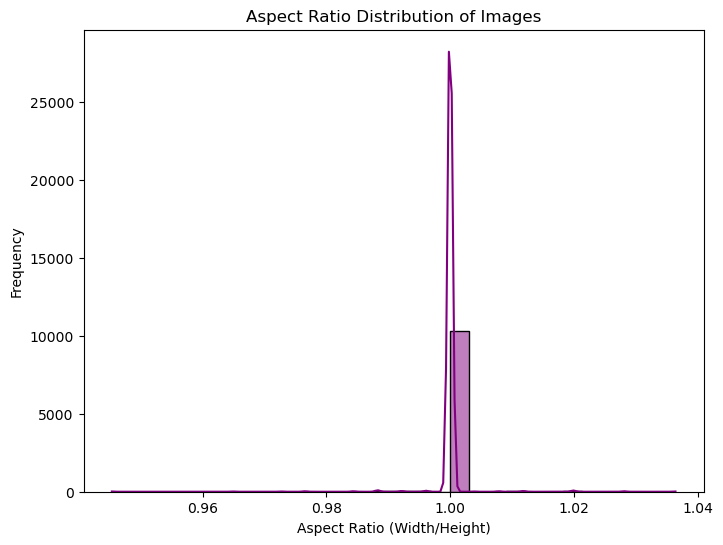

In [222]:
import cv2
aspect_ratios = []

for class_name in class_counts.keys():
    class_path = os.path.join(folder_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            h, w = img.shape[:2]
            aspect_ratios.append(w / h)

plt.figure(figsize=(8, 6))
sns.histplot(aspect_ratios, kde=True, bins=30, color="purple")
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Frequency")
plt.title("Aspect Ratio Distribution of Images")
plt.show()


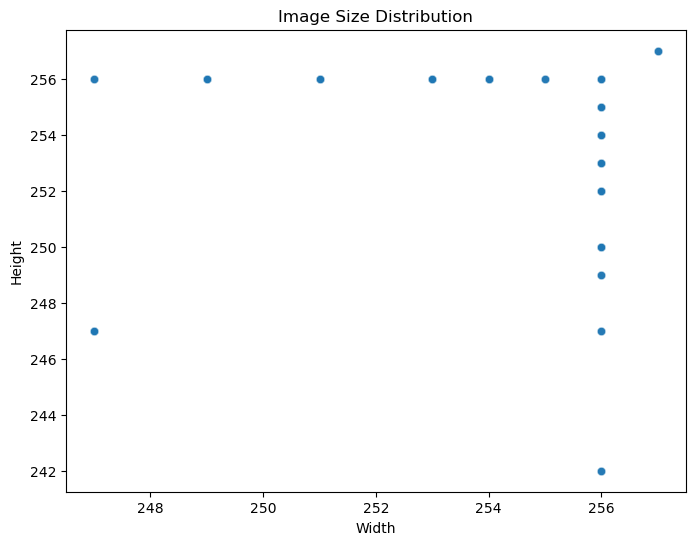

In [224]:
widths, heights = zip(*[(w, h) for w, h in [cv2.imread(os.path.join(folder_path, class_name, img_name)).shape[:2] 
                     for class_name in class_counts.keys() for img_name in os.listdir(os.path.join(folder_path, class_name))] if w and h])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=widths, y=heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution")
plt.show()


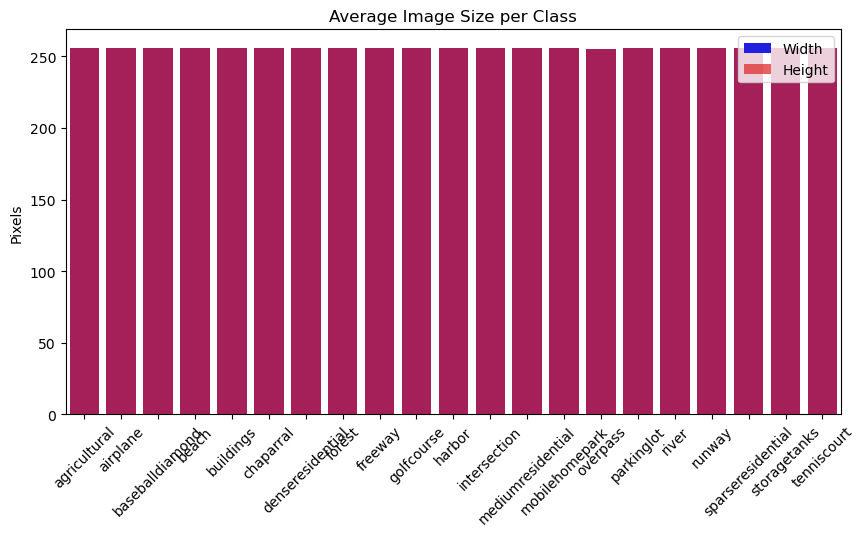

In [226]:
import numpy as np
avg_sizes = {}

for class_name in class_counts.keys():
    sizes = [(cv2.imread(os.path.join(folder_path, class_name, img_name)).shape[:2])
             for img_name in os.listdir(os.path.join(folder_path, class_name))
             if cv2.imread(os.path.join(folder_path, class_name, img_name)) is not None]
    widths, heights = zip(*sizes) if sizes else ([], [])
    avg_sizes[class_name] = (np.mean(widths), np.mean(heights))

plt.figure(figsize=(10, 5))
sns.barplot(x=list(avg_sizes.keys()), y=[s[0] for s in avg_sizes.values()], color="blue", label="Width")
sns.barplot(x=list(avg_sizes.keys()), y=[s[1] for s in avg_sizes.values()], color="red", label="Height", alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.title("Average Image Size per Class")
plt.ylabel("Pixels")
plt.show()


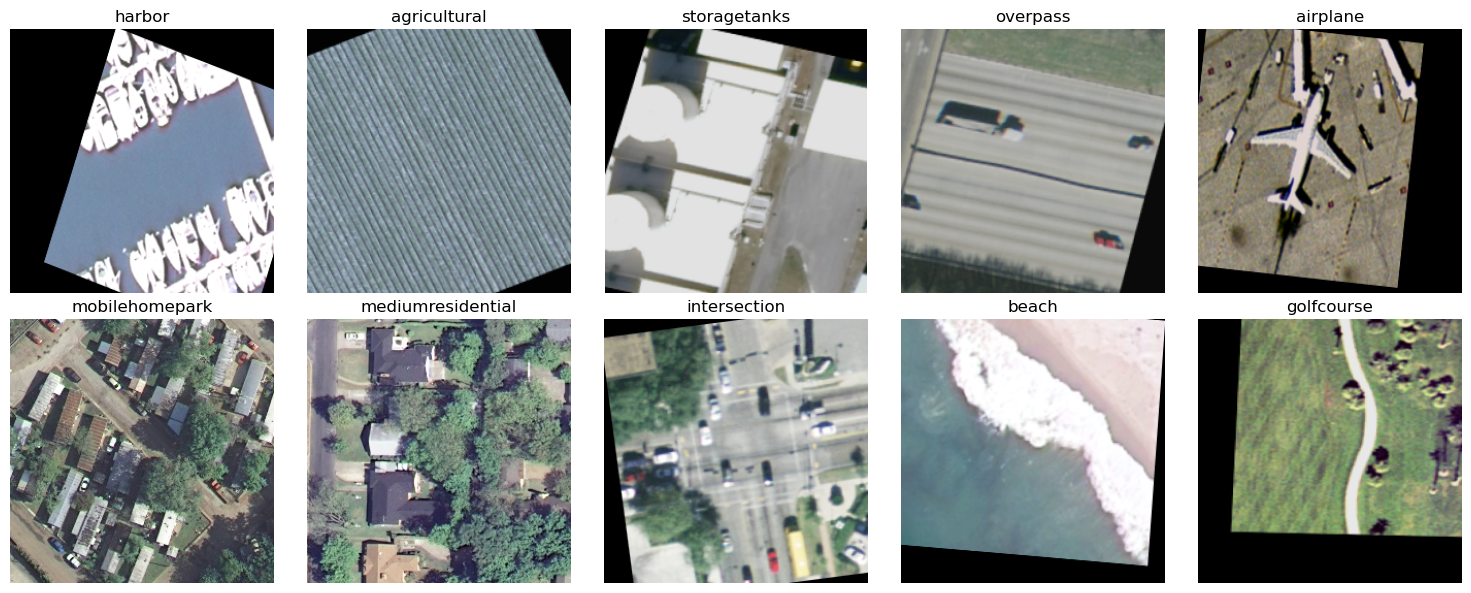

In [245]:
import random
import matplotlib.pyplot as plt
import cv2

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i, class_name in enumerate(random.sample(list(class_counts.keys()), 10)):
    class_path = os.path.join(folder_path, class_name)
    img_path = os.path.join(class_path, random.choice(os.listdir(class_path)))
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis("off")

plt.tight_layout()
plt.show()


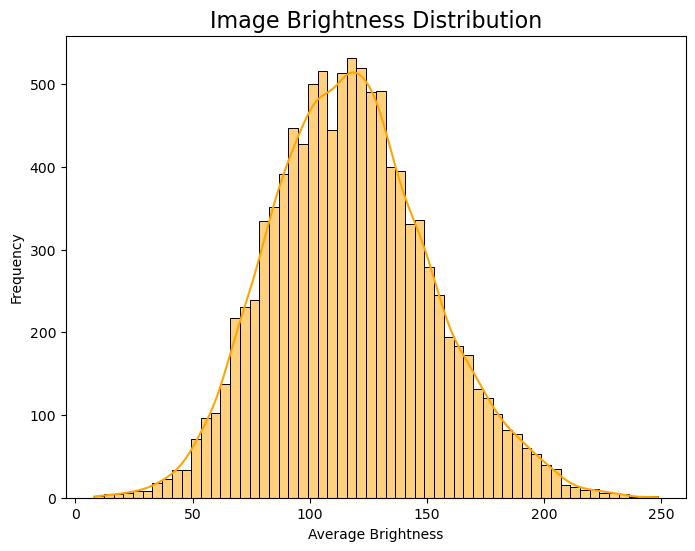

In [247]:
import numpy as np

# Calculate average brightness for each image
brightness = [np.array(Image.open(img).convert('L')).mean() for img in image_files]

# Plot brightness distribution
plt.figure(figsize=(8, 6))
sns.histplot(brightness, kde=True, color='orange')
plt.title("Image Brightness Distribution", fontsize=16)
plt.xlabel("Average Brightness")
plt.ylabel("Frequency")
plt.show()

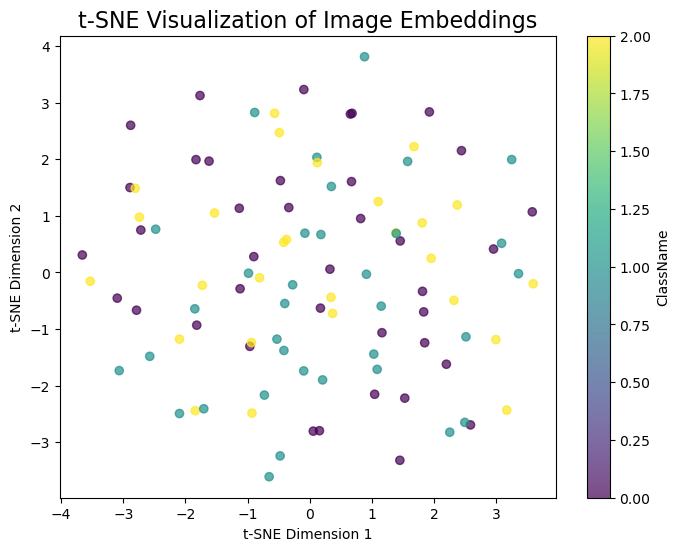

In [248]:
from sklearn.manifold import TSNE

# Example: Randomly generated embeddings (replace with actual embeddings)
embeddings = np.random.rand(100, 128)  # 100 images with 128-dimensional embeddings
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=np.random.randint(0, 3, 100), cmap='viridis', alpha=0.7)
plt.title("t-SNE Visualization of Image Embeddings", fontsize=16)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="ClassName")
plt.show()

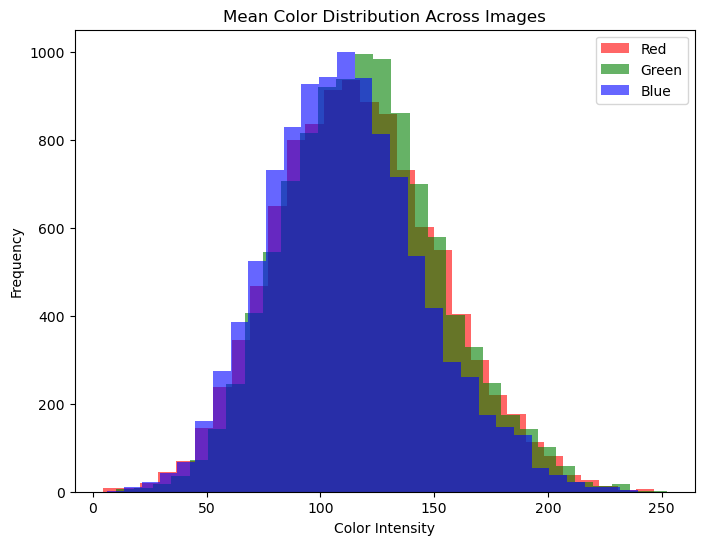

In [249]:
import numpy as np

color_means = []

for class_name in class_counts.keys():
    class_path = os.path.join(folder_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            mean_color = np.mean(img, axis=(0, 1))
            color_means.append(mean_color)

color_means = np.array(color_means)
plt.figure(figsize=(8, 6))
plt.hist(color_means[:, 2], bins=30, color='red', alpha=0.6, label='Red')
plt.hist(color_means[:, 1], bins=30, color='green', alpha=0.6, label='Green')
plt.hist(color_means[:, 0], bins=30, color='blue', alpha=0.6, label='Blue')
plt.xlabel("Color Intensity")
plt.ylabel("Frequency")
plt.title("Mean Color Distribution Across Images")
plt.legend()
plt.show()


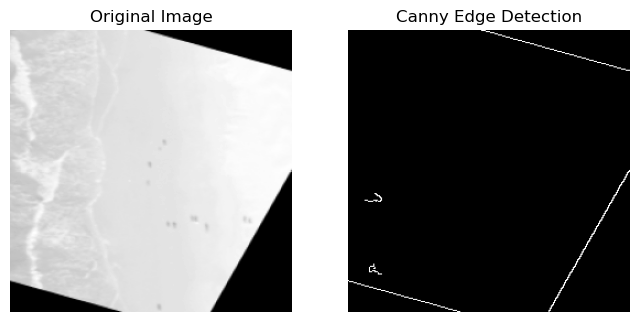

In [255]:
sample_class = random.choice(list(class_counts.keys()))
sample_img = random.choice(os.listdir(os.path.join(folder_path, sample_class)))
img = cv2.imread(os.path.join(folder_path, sample_class, sample_img), cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 50, 150)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

plt.show()


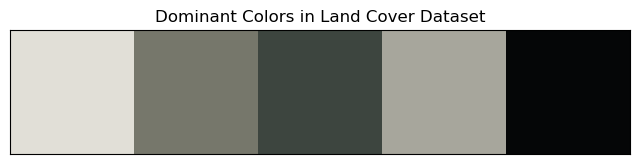

In [260]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Path to dataset
folder_path = "landuse_scene_classification/images"

# Number of dominant colors to extract
num_colors = 5

# Collect pixels from a subset of images
all_pixels = []

# Iterate through classes
for class_name in os.listdir(folder_path):
    class_path = os.path.join(folder_path, class_name)
    
    if os.path.isdir(class_path):  # Ensure it's a directory
        images = os.listdir(class_path)[:5]  # Sample a few images from each class
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = img.reshape(-1, 3)  # Flatten image into pixels
                all_pixels.append(img)

# Stack all pixels into a single array
all_pixels = np.vstack(all_pixels)

# Apply K-Means clustering to find dominant colors
kmeans = KMeans(n_clusters=num_colors, random_state=42, n_init=10)
kmeans.fit(all_pixels)

# Extract the cluster centers (dominant colors)
dominant_colors = kmeans.cluster_centers_.astype(int)

# Plot the dominant colors
plt.figure(figsize=(8, 2))
plt.imshow([dominant_colors])  # Show colors as a horizontal bar
plt.xticks([])
plt.yticks([])
plt.title("Dominant Colors in Land Cover Dataset")
plt.show()


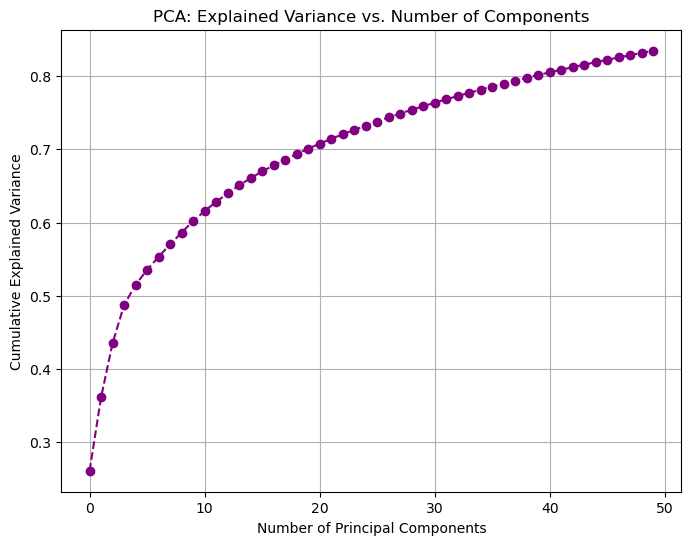

In [263]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Path to dataset
folder_path = "landuse_scene_classification/images"

# Number of images to use for PCA (to avoid excessive memory usage)
num_images = 100  
image_size = (64, 64)  # Resize images for consistency

# Collect images
image_data = []

# Iterate through classes and images
for class_name in os.listdir(folder_path):
    class_path = os.path.join(folder_path, class_name)

    if os.path.isdir(class_path):  # Ensure it's a directory
        images = os.listdir(class_path)[:10]  # Take 10 images per class (adjust as needed)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                img = cv2.resize(img, image_size)  # Resize for consistency
                image_data.append(img.flatten())  # Flatten the image into a 1D vector

# Convert to NumPy array
image_data = np.array(image_data)

# Apply PCA for dimensionality reduction
num_components = 50  # Reduce to 50 principal components
pca = PCA(n_components=num_components)
pca_transformed = pca.fit_transform(image_data)

# Explained variance plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='purple')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.grid()
plt.show()
